In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/train.csv', usecols=["Age", "Fare", "Survived"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
X_train["Age_imputed"] = X_train["Age"]
X_test["Age_imputed"] = X_test["Age"]

In [12]:
X_train["Age_imputed"][X_train["Age_imputed"].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values
X_test["Age_imputed"][X_test["Age_imputed"].isnull()] = X_test["Age"].dropna().sample(X_test["Age"].isnull().sum()).values

In [13]:
# Above code is a little confusing but go through it one by one, and you should get what it means.

/var/folders/cb/g9zml9hd4fgfyshv4x2_v4q40000gn/T/ipykernel_32296/1079629169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"], label="Original", hist=False)
/var/folders/cb/g9zml9hd4fgfyshv4x2_v4q40000gn/T/ipykernel_32296/1079629169.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

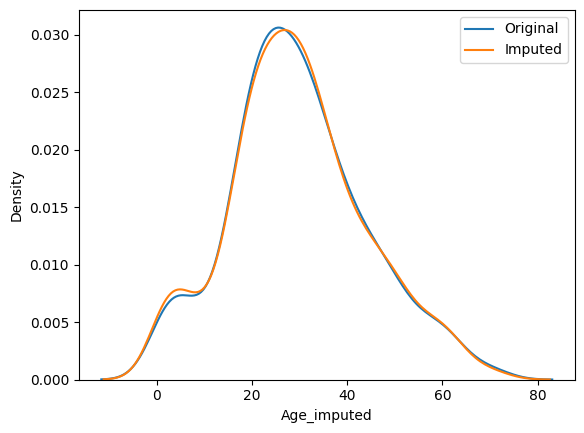

In [17]:
# Lets see how the distribution has changed

sns.distplot(X_train["Age"], label="Original", hist=False)
sns.distplot(X_train["Age_imputed"], label="Imputed", hist=False)

plt.legend()
plt.show()

In [18]:
print("Original variable variance: ", X_train["Age"].var())
print("Variance after random imputations: ", X_train["Age_imputed"].var())

Original variable variance:  204.34951339046142
Variance after random imputations:  206.47929767537414


In [19]:
X_train[["Fare", "Age", "Age_imputed"]].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,50.127598
Age,71.512440,204.349513,204.349513
Age_imputed,50.127598,204.349513,206.479298


<Axes: >

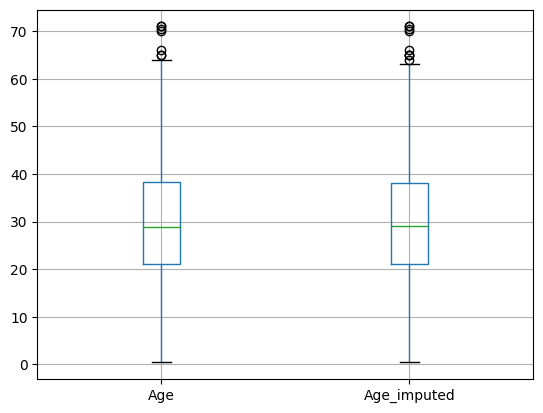

In [20]:
X_train[["Age", "Age_imputed"]].boxplot()

In [25]:
# This code should be used in production
# This makes sure, for same fare value, we should get same random state

# sampled_value = X_train["Age"].dropna().sample(1, random_state=int(observation["Fare"]))

# Categorical Data

In [ ]:
data = pd.read_csv('datasets/house-train.csv', usecols=["GarageQual", "FireplaceQu", "SalePrice"])

# Data needs to imported from git

In [ ]:
data.head()

In [ ]:
data.isnull().mean() * 100

In [ ]:
X = data
y = data["SalePrice"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, randome_state=2)

In [ ]:
X_train["GarageQual_imputed"] = X_train["GarageQual"]
X_test["GarageQual_imputed"] = X_test["GarageQual"]

X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"]
X_test["FireplaceQu_imputed"] = X_test["FireplaceQu"]

In [ ]:


X_train["GarageQual_imputed"][X_train["GarageQual_imputed"].isnull()] = X_train["GarageQual"].dropna().sample(X_train["GarageQual"].isnull().sum()).values
X_test["GarageQual_imputed"][X_test["GarageQual_imputed"].isnull()] = X_test["GarageQual"].dropna().sample(X_test["GarageQual"].isnull().sum()).values

X_train["FireplaceQu_imputed"][X_train["FireplaceQu_imputed"].isnull()] = X_train["FireplaceQu"].dropna().sample(X_train["FireplaceQu"].isnull().sum()).values
X_test["FireplaceQu_imputed"][X_test["FireplaceQu_imputed"].isnull()] = X_test["FireplaceQu"].dropna().sample(X_test["FireplaceQu"].isnull().sum()).values

In [ ]:
temp = pd.concat(
    [
        X_train["GarageQual"].value_counts() / len(X_train["GarageQual"].dropna()),
        X_train["GarageQual_imputed"].value_counts() / len(X_train)
    ], axis = 1
)
temp.columns = ['original', 'imputed']

In [ ]:
temp

In [ ]:
temp = pd.concat(
    [
        X_train["FireplaceQu"].value_counts() / len(X_train["FireplaceQu"].dropna()),
        X_train["FireplaceQu_imputed"].value_counts() / len(X_train)
    ], axis = 1
)
temp.columns = ['original', 'imputed']

In [ ]:
temp

In [ ]:
# We can detect this problem by plotting 1
for category in X_train["FireplaceQu"].dropna().unique():
    sns.distplot(X_train[X_train["FireplaceQu"] == category]["SalePrice"], hist=False, label=category)

plt.show()

In [ ]:
# We can detect this problem by plotting and 2, compare these
for category in X_train["FireplaceQu_imputed"].dropna().unique():
    sns.distplot(X_train[X_train["FireplaceQu_imputed"] == category]["SalePrice"], hist=False, label=category)

plt.show()